In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Пушкинская карта/cliks_add_request.csv', sep = ';', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824497 entries, 0 to 1824496
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   create_time         object 
 1   create_date         object 
 2   user_phone_details  object 
 3   buyer_mobile_phone  object 
 4   user_id             object 
 5   url                 object 
 6   session_id          int64  
 7   session_name        object 
 8   organization_id     int64  
 9   organization_name   object 
 10  session_identity    object 
 11  org_region_number   float64
 12  org_category        object 
 13  type                object 
 14  age                 float64
 15  user_region         float64
 16  category            object 
 17  end                 int64  
 18  tags                object 
 19  genre               object 
dtypes: float64(3), int64(3), object(14)
memory usage: 278.4+ MB


In [4]:
df.head(3)

,create_time,create_date,user_phone_details,buyer_mobile_phone,user_id,url,session_id,session_name,organization_id,organization_name,session_identity,org_region_number,org_category,type,age,user_region,category,end,tags,genre
0,2021-11-28 21:32:53,2021-11-28,"Android, 10 (SDK 29)",ce730a5e7bb6372aad126e934320b75c,08014dcd786881f349938c9255e9df36,https://theatreofnations.ru/performances/shved...,717865,Спектакль «Шведская спичка»,7577,ФГБУК «Государственный театр наций»,Спектакль,77.0,Театры,Театры_Спектакль_Комедия,21.0,21.0,Спектакли,1640709600000,"[{'_id': 28, 'name': 'Литература', 'sysName': ...",Комедия
1,2021-11-28 21:41:52,2021-11-28,"Android, 10 (SDK 29)",ce730a5e7bb6372aad126e934320b75c,08014dcd786881f349938c9255e9df36,https://theatreofnations.ru/performances/shved...,717865,Спектакль «Шведская спичка»,7577,ФГБУК «Государственный театр наций»,Спектакль,77.0,Театры,Театры_Спектакль_Комедия,21.0,21.0,Спектакли,1640709600000,"[{'_id': 28, 'name': 'Литература', 'sysName': ...",Комедия
2,2021-11-28 21:25:13,2021-11-28,"iOS, iOS 15.0.2",a1f60fad21d72c6dcb5fd7fe84fb3ad7,b2560eaa8bc23dbba5f24aa5075b89ed,https://tickets.hermitagemuseum.org/event/7E06...,1309020,Экспозиции главного музейного комплекса Эрмитажа,2217,ФГБУК «Государственный Эрмитаж»,Экспозиции,78.0,Музеи и галереи,Музеи и галереи_Экспозиции_,22.0,77.0,Выставки,1662476400000,"[{'_id': 24, 'name': 'История', 'sysName': 'is...",NaN


In [5]:
tag_list = df.tags.unique()

In [6]:
tag_list[0]

"[{'_id': 28, 'name': 'Литература', 'sysName': 'literatura'}, {'_id': 323, 'name': 'Исполнительское искусство', 'sysName': 'ispolnitelskoe-iskusstvo'}]"

In [7]:
del_list = ('[', ']', '{', '}', "'", '"')

In [8]:
for j in range(len(tag_list)):
  for i in del_list:
    tag_list[j] = tag_list[j].replace(i, '')
    tag_list[j] = tag_list[j].replace(':', ',')
  tag_list[j] = tag_list[j].split(', ')

In [9]:
for i in tag_list[1][3::6]:
  print(i)

История
Классическое искусство
Декоративно-прикладное искусство
Архитектура
Изобразительное искусство


In [10]:
from collections import Counter

tag_list_unique = Counter()
for j in range(len(tag_list)):
  for i in tag_list[j][3::6]:
   tag_list_unique[i] += 1

In [11]:
tag_list_unique.keys()

dict_keys(['Литература', 'Исполнительское искусство', 'История', 'Классическое искусство', 'Декоративно-прикладное искусство', 'Архитектура', 'Изобразительное искусство', 'Александр Грибоедов', 'Балет', 'Доступная среда', 'Биография', 'Премьера', 'Драма', 'Поэзия', 'Сергей Есенин', 'Театрализованное представление', 'Опера', 'Оперетта', 'Петр Чайковский', 'Мюзикл', 'Искусство', 'Для молодежи', 'Современное искусство', 'Танцы', 'Молодые люди', 'Дизайн', 'Фотография', 'Страны', 'name', 'Лекции', 'Михаил Булгаков', 'Русское искусство', 'Для детей', 'Экскурсии', 'Книги', 'Любительские театры', 'Театральный марафон', 'Виртуальный концертный зал', 'Мода', 'Комедия', 'Животные', 'Федор Достоевский', 'Детектив', 'Музыка', 'Классическая музыка', 'Мастер-классы', 'Кукольный спектакль', 'Сказка', 'Антон Чехов', 'Иван Бунин', 'Трагикомедия', 'Наука', 'Музыкальная комедия', 'Николай Гоголь', 'Вокальное искусство', 'Юмор', 'Хоровое пение', 'Александр Пушкин', 'Ночь искусств', 'Графика', 'Живопись', '

In [12]:
dict1 = {1: 1, 2: 9, 3: 4}
sorted_values = sorted(tag_list_unique.values(), reverse=True) # Sort the values
tag_list_unique_sorted = {}

for i in sorted_values:
    for k in tag_list_unique.keys():
        if tag_list_unique[k] == i:
            tag_list_unique_sorted[k] = tag_list_unique[k]
            break

print(tag_list_unique_sorted)

{'Для молодежи': 4569, 'Для детей': 2564, 'Молодые люди': 2419, 'Музыка': 1941, 'История': 1879, 'Классическое искусство': 1748, 'Доступная среда': 1446, 'Театрализованное представление': 1270, 'Литература': 1240, 'Искусство': 1191, 'Современное искусство': 1113, 'Исполнительское искусство': 924, 'Экскурсии': 895, 'Классическая музыка': 888, 'Комедия': 713, 'Премьера': 606, 'Драма': 554, 'Мастер-классы': 487, 'Живопись': 443, 'Декоративно-прикладное искусство': 439, 'Сказка': 403, 'Мюзикл': 343, 'Балет': 342, 'Кукольный спектакль': 320, 'Новый год': 319, 'Опера': 316, 'Коллекции': 305, 'Лекции': 296, 'Изобразительное искусство': 288, 'Книги': 284, 'Народная культура': 256, 'На воздухе': 245, 'Фестиваль': 230, 'Танцы': 228, 'Вокальное искусство': 219, 'Фотография': 216, 'Архитектура': 212, 'Графика': 205, 'Трагикомедия': 198, 'Хореография': 196, 'Русское искусство': 188, 'Музыкальная комедия': 186, 'Краеведение': 184, 'Виртуальный концертный зал': 181, 'Творчество': 177, 'Эксперименталь

In [14]:
df.sample(3)

,create_time,create_date,user_phone_details,buyer_mobile_phone,user_id,url,session_id,session_name,organization_id,organization_name,session_identity,org_region_number,org_category,type,age,user_region,category,end,tags,genre
1005329,2021-11-26 13:40:44,2021-11-26,"Android, 11 (SDK 30)",a25965acca6d6f9c2667cd44b7bde859,5d540fa2f16b2500dc15931be67d8744,http://www.maly.ru/checkout/select-date?perfor...,16883,Спектакль «Пиковая дама»,4941,ФГБУК «Государственный академический Малый теа...,Спектакль,77.0,Театры,Театры_Спектакль_Драма,17.0,77.0,Спектакли,1647198000000,"[{'_id': 25, 'name': 'Классическое искусство',...",Драма
294946,2021-11-30 06:15:20,2021-11-30,"Android, 8.0.0 (SDK 26)",daff2a6de49d1a9ba322ec8e1ef77069,f52b044fd1bea178cc4704098cbc1b3e,http://kurskdrama.ru/repertuar-teatra.html,1013320,Спектакль «Похищение Джонни»,10229,ОБУК «Курский государственный драматический те...,Спектакль,46.0,Театры,Театры_Спектакль_Комедия,22.0,46.0,Спектакли,1650105000000,[],Комедия
426558,2021-11-25 04:25:39,2021-11-25,"Android, 10 (SDK 29)",08ca093fd746e76cbf88764fcc82b87f,57418ed1b1a93717855b21f5c98d8b41,https://kirov.kassy.ru/events/detskie/2-11639/,1378300,Спектакль «Мой дедушка»,7244,КОГАУК «Кировский театр кукол им. А. Н. Афанас...,Спектакль,43.0,Театры,Театры_Спектакль_,16.0,43.0,Спектакли,1638010800000,"[{'_id': 39, 'name': 'Для детей', 'sysName': '...",NaN


In [70]:
df['tag_name'] = df['tags']

In [71]:
for i in del_list:
  df['tag_name'] = df['tag_name'].apply(lambda x: x.replace(i, ''))

In [72]:
df['tag_name'] = df['tag_name'].apply(lambda x: x.replace(':', ','))

In [74]:
df['tag_name'] = df['tag_name'].apply(lambda x: x.split(','))

In [76]:
df['tag_name'] = df['tag_name'].apply(lambda x: x[3::6])

In [79]:
df[df['tag_count'] == 1]['tag_name'].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[ Комедия]                           55096
[ Опера]                             29517
[ Для молодежи]                      22528
[ Драма]                             19981
[ Театрализованное представление]    17695
                                     ...  
[ Авторская песня]                       1
[ Александр Блок]                        1
[ Любительские театры]                   1
[ Хоровое пение]                         1
[ Творчество]                            1
Name: tag_name, Length: 118, dtype: int64

In [46]:
df['tag_count'].unique

<bound method Series.unique of 0          _id, 28, name, Литература, sysName, literatura...
1          _id, 28, name, Литература, sysName, literatura...
2          _id, 24, name, История, sysName, istoriya, _id...
3          _id, 508, name, Александр Грибоедов, sysName, ...
4          _id, 31, name, Балет, sysName, balet, _id, 323...
                                 ...                        
1824492    _id, 2, name, На воздухе, sysName, na-vozduhe,...
1824493    _id, 29, name, Музыка, sysName, muzyka, _id, 1...
1824494    _id, 29, name, Музыка, sysName, muzyka, _id, 3...
1824495    _id, 427, name, Музыкальная комедия, sysName, ...
1824496    _id, 26, name, Современное искусство, sysName,...
Name: tag_count, Length: 1824497, dtype: object>

In [47]:
df['tag_count'] = df['tag_count'].apply(lambda x: x.split(','))

In [48]:
df['tag_count'] = df['tag_count'].apply(lambda x: round(len(x)/6, 0))

In [66]:
df['tag_count'].value_counts()

3.0     458138
2.0     339681
4.0     295553
1.0     276589
5.0     165455
0.0     145494
6.0      75312
7.0      31074
8.0      19327
9.0      10993
10.0      6881
Name: tag_count, dtype: int64

In [69]:
df.shape

(1824497, 21)

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Количество тегов')

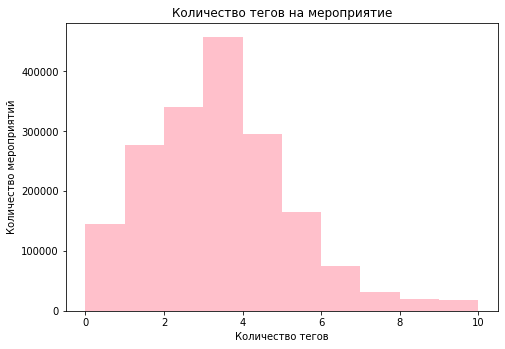

In [65]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['tag_count'], color = 'Pink')
axes.set_title('Количество тегов на мероприятие')
axes.set_ylabel('Количество мероприятий')
axes.set_xlabel('Количество тегов')